# Music Genre Classification Using KNN

# Step 1: Data Extraction

In [376]:
#Importing Required Libraries

import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
import warnings
warnings.simplefilter("ignore", UserWarning)

In [377]:
# Creating a CSV file and naming the columns to insert data

X = []
y = []
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
mfcc = []
for i in range(1, 21):
    mfcc.append('mfcc'+str(i))
    
header = ['file_path','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']

header = header + mfcc +['genre']

import csv
file = open('C:\Script_chain_healthcare\genres\data-30s.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [378]:
# loading the data into excel

for genre in genres:
    for i in range(100):
        if len(str(i)) == 1:
            i = str(0)+str(i)
        file_path = "C:/Script_chain_healthcare/genres/"+genre+'/'+genre+'.000'+str(i)+".au"
        y, sr = librosa.load(file_path, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
        to_append = f'{file_path} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {genre}'
        file = open('C:\Script_chain_healthcare\genres\data-30s.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())  

In [523]:
fileName = 'data-30s.csv'
df = pd.read_csv(fileName)
df

,file_path,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,C:/Script_chain_healthcare/genres/blues/blues....,0.349951,0.130192,1784.416546,2002.657106,3806.418650,0.083066,-113.619385,121.553017,-19.151056,...,8.806787,-3.665802,5.745939,-5.161711,0.750298,-1.688358,-0.409329,-2.298869,1.219947,blues
1,C:/Script_chain_healthcare/genres/blues/blues....,0.340945,0.095892,1529.871314,2038.612143,3548.986873,0.056044,-207.581512,123.997147,8.939115,...,5.375942,-2.237833,4.217125,-6.011047,0.932668,-0.717028,0.292333,-0.285717,0.532144,blues
2,C:/Script_chain_healthcare/genres/blues/blues....,0.363562,0.175494,1552.637786,1747.382028,3041.089944,0.076301,-90.776344,140.448608,-29.100559,...,5.785763,-8.899733,-1.087024,-9.216774,2.453649,-7.721793,-1.816497,-3.434353,-2.231391,blues
3,C:/Script_chain_healthcare/genres/blues/blues....,0.404848,0.141139,1070.110059,1596.244204,2185.061787,0.033309,-199.462006,150.094727,5.649167,...,6.085354,-2.476188,-1.076225,-2.876056,0.776909,-3.320055,0.637263,-0.617507,-3.406940,blues
4,C:/Script_chain_healthcare/genres/blues/blues....,0.308598,0.091540,1835.507009,1748.367477,3581.003346,0.101500,-160.291855,126.195763,-35.602501,...,-2.809849,-6.935621,-7.559294,-9.172152,-4.510408,-5.453736,-0.924468,-4.408076,-11.701833,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C:/Script_chain_healthcare/genres/rock/rock.00...,0.351992,0.079441,2008.537045,2106.349206,4254.124276,0.089267,-153.616501,109.894516,-23.106592,...,12.349251,-12.316458,5.778132,-10.268911,1.805271,-13.300427,2.473230,-6.719625,-1.199268,rock
996,C:/Script_chain_healthcare/genres/rock/rock.00...,0.398761,0.076425,2006.009248,2068.224879,4147.166589,0.097659,-142.442062,116.238441,-32.190319,...,14.067452,-16.397627,4.162116,-4.357301,3.738005,-10.854526,1.872500,-7.467166,-2.797982,rock
997,C:/Script_chain_healthcare/genres/rock/rock.00...,0.431909,0.081583,2077.166788,1926.895810,4030.750627,0.121824,-125.065109,115.203308,-48.004681,...,10.486740,-17.959635,1.215705,-11.543171,1.846609,-12.854931,3.451785,-12.594253,-2.104668,rock
998,C:/Script_chain_healthcare/genres/rock/rock.00...,0.362428,0.083834,1398.581575,1817.813570,3014.673437,0.048731,-224.994019,123.669685,-9.775933,...,7.690068,-10.085666,-0.251356,-5.283349,-2.814905,-4.421223,1.560510,-5.046413,-3.582565,rock


# Step 2: Exploratory Data Analysis

In [524]:
# getting the summary of the data like mean, std, max value, in value

df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378695,0.130875,2201.908469,2242.614167,4571.877800,0.103637,-144.496742,99.552164,-8.924881,36.292214,...,-6.023232,4.471887,-4.798732,1.782026,-3.871422,1.148224,-3.968648,0.506963,-2.329796,-1.094989
std,0.081704,0.065659,715.936438,526.313832,1574.686968,0.041834,100.229591,31.326971,21.692575,16.667017,...,6.819009,6.717816,6.171305,5.009955,4.874417,4.579380,4.550691,3.869773,3.755526,3.837660
min,0.171770,0.005270,570.150688,899.979779,749.528801,0.021701,-552.106323,-1.539154,-89.896149,-18.786009,...,-28.050291,-15.806172,-27.549044,-12.605565,-17.545372,-15.697483,-17.235107,-11.985029,-18.505476,-19.933725
25%,0.319462,0.086586,1628.001257,1907.119009,3381.008722,0.070281,-200.701469,76.808641,-24.225842,24.103230,...,-10.972273,-0.551719,-9.365387,-1.641189,-7.162336,-1.856042,-7.201042,-2.005189,-4.672607,-3.364302
50%,0.383055,0.122397,2209.457924,2221.382901,4658.484331,0.099539,-120.226311,98.442829,-10.723772,36.950247,...,-5.918072,3.889783,-4.200263,1.878470,-3.620379,1.219209,-4.065450,0.668484,-2.391220,-1.153429
75%,0.435605,0.175723,2691.943500,2578.518764,5534.110286,0.132007,-73.922523,119.879930,5.497600,48.195987,...,-0.991921,9.707967,-0.157045,5.152308,-0.322555,4.347917,-0.843982,3.111888,0.151594,1.304284
max,0.663541,0.397851,4434.948742,3509.582338,8676.447535,0.274829,42.112869,193.094482,56.636234,80.692482,...,17.423235,23.026806,13.060921,18.160437,12.356573,13.479482,11.479181,15.386705,14.691521,15.362202


<AxesSubplot:xlabel='genre'>

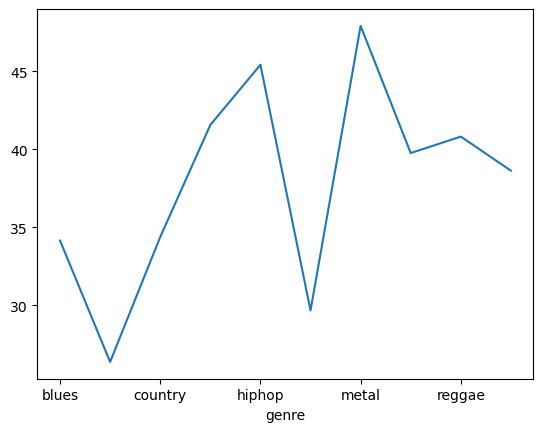

In [537]:
#chroma_stft vs genre


df.groupby(['genre']).sum()["chroma_stft"].plot()

<AxesSubplot:xlabel='rmse', ylabel='genre'>

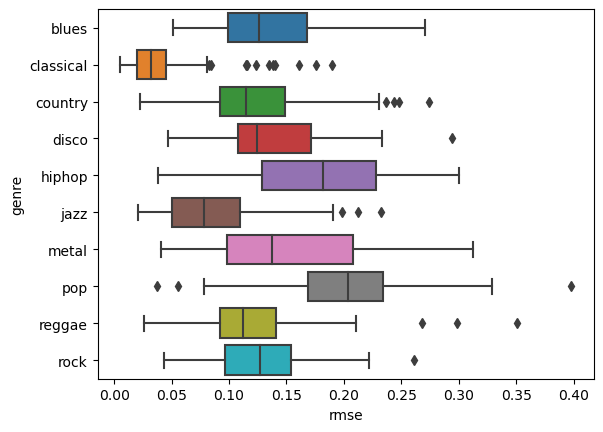

In [515]:
#rmse vs genre

sns.boxplot(data = df, x = df["rmse"], y = df["genre"])

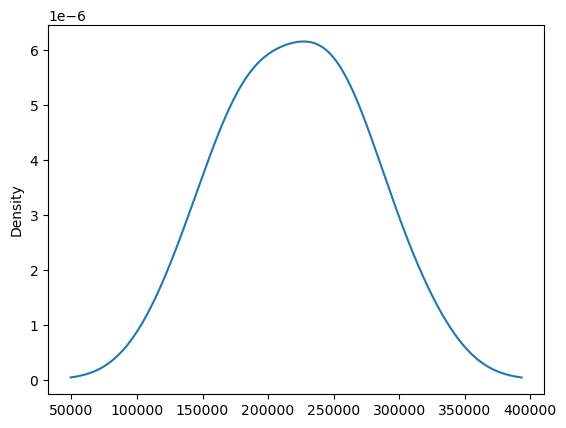

In [516]:
#spectral_centriod vs genre

df_spectral = df.groupby(['genre']).sum()["spectral_centroid"].plot(kind="kde")

In [517]:
df_spectral = pd.DataFrame(df.groupby(['genre']).sum()["spectral_bandwidth"])
df_spectral

,spectral_bandwidth
genre,
blues,193136.093041
classical,152189.109301
country,209952.727456
disco,251346.524773
hiphop,251357.533508
jazz,202107.543150
metal,224252.708810
pop,300828.507566
reggae,231157.877157


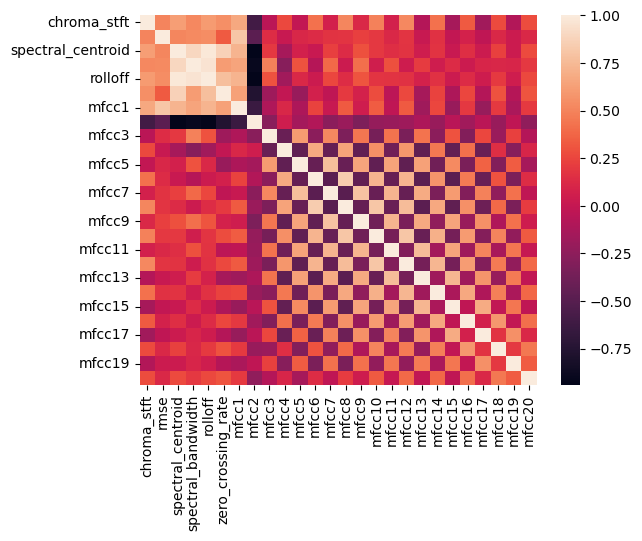

In [525]:
# correlation matrix

matrix = df.corr().round(2)
sns.heatmap(matrix, annot=False)
plt.autoscale()

# Model Training and prediction using KNN

In [573]:
# assiging Predictors to X and response to Y 

import pandas as pd
X = df.iloc[:,1:27]
y = df.iloc[:,27]


random.seed(10)

# splitting the data in the ratio of 80:20 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


from sklearn.model_selection import cross_val_score
# Create a list of candidate values for the n_neighbors parameter
neighbors_list = np.arange(1,50, 2)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the candidate values for n_neighbors
for n_neighbors in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the value of n_neighbors that gives the best performance
best_n = neighbors_list[np.argmax(cv_scores)]


# Train a KNN model with the best value of n_neighbors
knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)

# Evaluate the performance on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

import warnings
warnings.simplefilter("ignore")

In [574]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.3466666666666667
0.30873068779170354
0.34061120104294274
0.30498428193923


# Conclusion

we can observe that accuracy, precision , recall and F-1 score is very less

so we can go with more complex models than KNN